### **高斯噪声**

高斯噪声是指噪声分布的概率密度函数服从高斯分布(正态分布)的噪声

产生原因是拍摄时现场较暗且亮度不均匀，同时相机长时间工作使得元器件温度过高，自身的噪声及相互之间的影响也会产生

OpenCV4没有提供专门添加高斯噪声的函数，需要自行编写，利用np.random.normal()函数产生符合高斯分布的随机数，添加的过程大致可分为以下3个步骤：

1. 根据图像尺寸，生成符合高斯分布的随机数矩阵
2. 将原图像和生成的随机数矩阵相加
3. 得到添加高斯噪声之后的图像

In [1]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [2]:
def add_noise(image, mean=0, val=0.01):
    # val此处定义为方差
    # 获取图像的尺寸
    size = image.shape
    # 利用无穷范数归一化图像
    image = image / 255
    # 生成符合高斯分布的随机数矩阵
    gauss = np.random.normal(mean, val**0.5, size)
    noise = image + gauss
    return gauss, noise

In [3]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'dolphins.jpg')[:, :, [2, 1, 0]]
if img is None:
    print('Failed to read dolphins.jpg')
    sys.exit

In [4]:
# 为灰度图像添加高斯噪声
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_gauss, gray_noisy_image = add_noise(gray_image)
# 为彩色图像添加高斯噪声
color_gauss, color_noisy_image = add_noise(img)

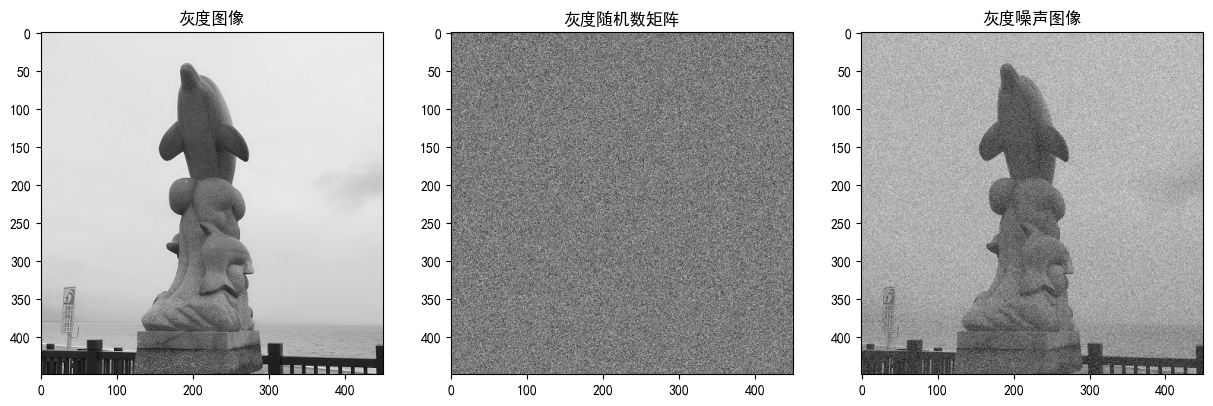

In [5]:
# 展示结果
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('灰度图像')
plt.imshow(gray_image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('灰度随机数矩阵')
plt.imshow(gray_gauss, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('灰度噪声图像')
plt.imshow(gray_noisy_image, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


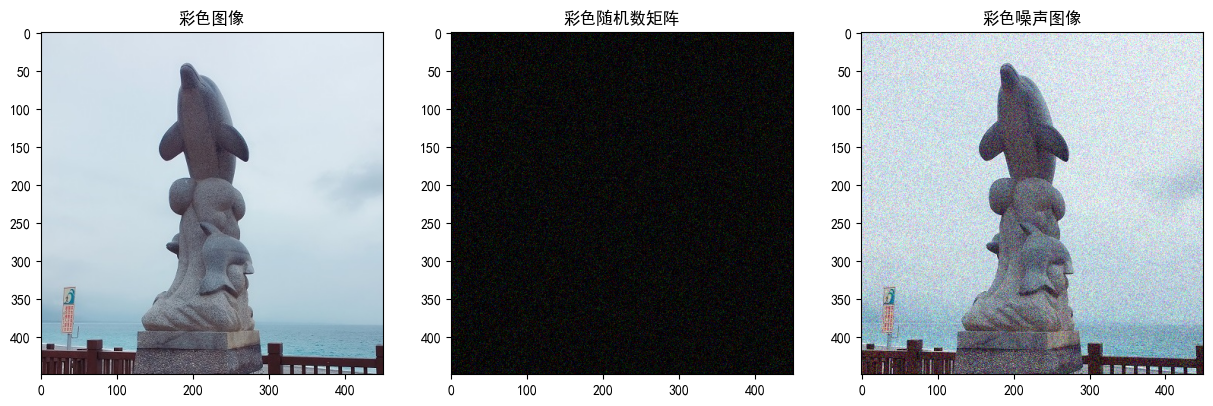

In [6]:
# 展示结果
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('彩色图像')
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.title('彩色随机数矩阵')
plt.imshow(color_gauss)
plt.subplot(1, 3, 3)
plt.title('彩色噪声图像')
plt.imshow(color_noisy_image)